Importing dependencies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [23]:
#Loading CSV file to pandas dataframe
car_dataset = pd.read_csv('/content/CarDatasets.csv')

In [24]:
#Inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [25]:
#Checking the rows and columns
car_dataset.shape

(4340, 8)

In [26]:
#Get the dataframe info
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [27]:
#Checking the missing values of the dataset
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [53]:
#Checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

1    2153
0    2123
2      40
3      24
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
0    3892
1     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


Encoding the Categorical Data

In [62]:
#Encoding "Fuel_Type" Column
car_dataset.replace({'fuel' : {'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace = True)

#Encoding "Seller_Type" Column
car_dataset.replace({'seller_type' : {'Dealer' : 0, 'Individual' : 1, 'Trustmark Dealer':3}}, inplace = True)

#Encoding "Transmission" Column
car_dataset.replace({'transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace = True)

#Encoding "Owner" Column
car_dataset.replace({'owner' : {'First Owner': 1, 'Second Owner' : 2, 'Third Owner' : 3, 'Fourth & Above Owner' : 4, 'Test Drive Car' : 5}}, inplace = True)

In [63]:
#Checking if encoding worked
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,2


Splitting the data and Target

In [65]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [66]:
print(X)
print(Y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      1
1     2007      50000     0            1             0      1
2     2012     100000     1            1             0      1
3     2017      46000     0            1             0      1
4     2014     141000     1            1             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      2
4336  2014      80000     1            1             0      2
4337  2009      83000     0            1             0      2
4338  2016      90000     1            1             0      1
4339  2016      40000     0            1             0      1

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Training Data and Evaluation Data

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

Model Training
1.   Linear Regression


In [68]:
#Loading the linear regression model
lgm = LinearRegression()

In [70]:
#Training our linear regression model (lgm)
lgm.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [72]:
#Prediction on training data
training_data_prediction = lgm.predict(X_train)

In [73]:
#R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.42699369530866615


Visualize the Actual Price vs Predicted Price

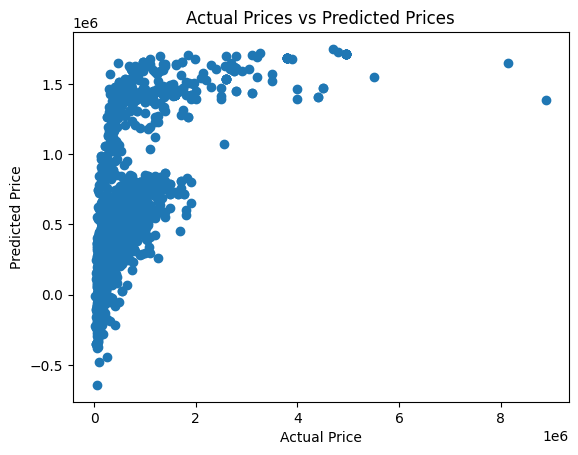

In [78]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [81]:
#Prediction on test data
testing_data_prediction = lgm.predict(X_test)

In [82]:
#R squared error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.4733678261163742


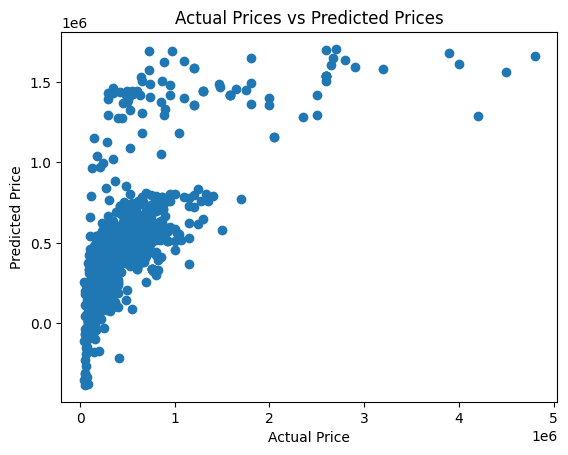

In [83]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [84]:
#Lasso Regression Model
lasgm = Lasso()

In [101]:
#Training the lasso regression model(lgm)
lasgm.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [103]:
#Prediction on training data
training_data_prediction = lasgm.predict(X_train)

In [104]:
#R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.4269936952584783


Visualize the Actual Price vs Predicted Price

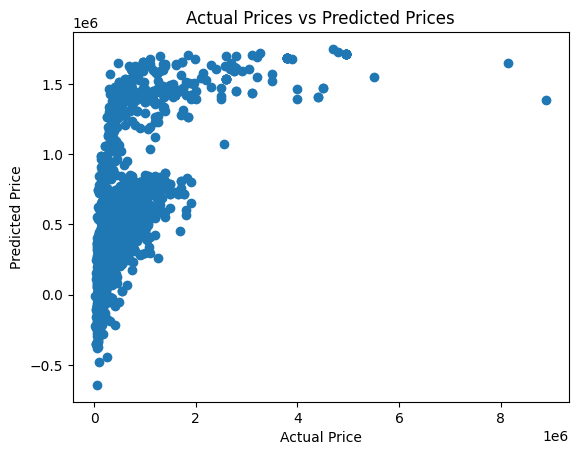

In [105]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [106]:
#Prediction on test data
testing_data_prediction = lasgm.predict(X_test)

In [107]:
#R squared error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.47336847140430405


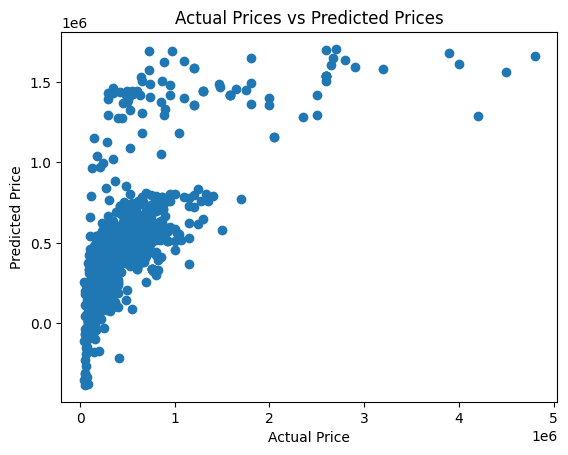

In [108]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()